In [1]:
##~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
##
## XGBOOST - Compare Model Outcome and Speed
## Implement Different Models and Compare Model Outcomes with XGBClassifier
## By Jothi
##
##~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

vAR_model_data =  pd.read_csv("/content/DSAI-LVA-Healthy_YES_NO.csv")
vAR_model_data.head() # Top 5 rows

X = vAR_model_data.drop(['Healthy_YES_NO'],axis=1) ## Remove Target/Labels from the data set.
y = vAR_model_data['Healthy_YES_NO'] ## Target/Labels

##
## Implement Different Models and Compare Model Outcomes with XGBClassifier
##
vAR_model_name = []
vAR_model_name.append(('LogisticRegression', LogisticRegression()))
vAR_model_name.append(('KNN', KNeighborsClassifier()))
vAR_model_name.append(('SVM', SVC()))
vAR_model_name.append(('AdaBoost', AdaBoostClassifier()))
vAR_model_name.append(('XGB',XGBClassifier(eta=0.01,gamma=10))) #eta = 0.01,gamma = 10
# vAR_model_name.append(('XGB',XGBClassifier())) #eta = 0.01,gamma = 10

import time ## Compare model runtime - model time taken

##
## All models should be fitted and predicted
##

for name, model in vAR_model_name:
    start_time = time.time()
    model.fit(X, y)
    y_pred = model.predict(X)
    vAR_model_predictions = [round(value) for value in y_pred]

##
## The accuracy and runtime of all the models should be compared
##

    accuracy = accuracy_score(y,vAR_model_predictions)
    print("Model Prediction Accuracy: %.2f%%" % (accuracy * 100.0),name)
    print("Model Run Time  %s seconds ---" % (time.time() - start_time))
    print("\n")

Model Prediction Accuracy: 75.26% LogisticRegression
Model Run Time  0.030817031860351562 seconds ---


Model Prediction Accuracy: 80.86% KNN
Model Run Time  0.04906129837036133 seconds ---


Model Prediction Accuracy: 75.91% SVM
Model Run Time  0.039617300033569336 seconds ---


Model Prediction Accuracy: 79.95% AdaBoost
Model Run Time  0.13284564018249512 seconds ---


Model Prediction Accuracy: 74.74% XGB
Model Run Time  0.09118461608886719 seconds ---




In [2]:
## ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
##
## Using multiple classifiers for the same problem on the same data
## Decision Tree, Random Forest, and KNeighborsClassifier
## ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
from sklearn import datasets
iris = datasets.load_iris()
X= iris.data
y=iris.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .5)
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
## Model #1 -  DecisionTree
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#from sklearn import tree
#vAR_classifier = tree.DecisionTreeClassifier()
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
## Model #2 -  KNeighborsClassifier
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#from sklearn.neighbors import KNeighborsClassifier
#vAR_classifier = KNeighborsClassifier()
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
## Model #3 -  RandomForestClassifier
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
from sklearn.ensemble import RandomForestClassifier
vAR_classifier = RandomForestClassifier()
vAR_classifier.fit(X_train,y_train)
vAR_predictions=vAR_classifier.predict(X_test)
#print(vAR_predictions)
from sklearn.metrics import accuracy_score
vAR_model_accuracy = accuracy_score(vAR_predictions,y_test)
print(vAR_model_accuracy)

0.9466666666666667


In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create a sample dataset with missing values
data = {'feature1': [1, 2, np.nan, 4, 5],
        'feature2': [3, np.nan, 5, 7, 9],
        'target': [0, 1, 0, 1, 1]}
df = pd.DataFrame(data)

# Split the data into features and target
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost classifier model
model = XGBClassifier()
# model = DecisionTreeClassifier()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(y_pred)
result = accuracy_score(y_test,y_pred)
print(result)

# Perform cross-validation
# scores = cross_val_score(model, X, y, cv=2)
# print("Cross-Validation Scores:", scores)
# print("Mean Accuracy:", np.mean(scores))


[0]
0.0


  CustomerName  AgeGroup   Spend
0         John        27   70000
1         Mike        29   90000
2         Lisa        29   61000
3         Adam        28   60000
4          Jim        42  150000
[2 2 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 1]
  CustomerName  AgeGroup   Spend  cluster
0         John        27   70000        2
1         Mike        29   90000        2
2         Lisa        29   61000        1
3         Adam        28   60000        1
4          Jim        42  150000        0
[[3.82857143e+01 1.50000000e+05]
 [3.29090909e+01 5.61363636e+04]
 [3.40000000e+01 8.05000000e+04]]


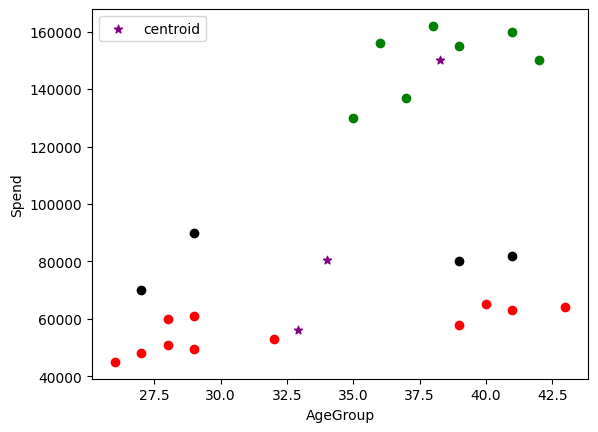

In [4]:
##~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
## K Menas - The Clustering Algorithm
## Implement the Elbow Method and MinMaxScaler()
## By Jothi
##~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
df = pd.read_csv("/content/DSAI-LVA-Customer-Income-KMeans.csv")
print(df.head())

#plt.scatter(df.AgeGroup,df['Spend'])
#plt.xlabel('AgeGroup')
#plt.ylabel('Spend')

##
## km.fit_predict
## Fit part of fit_predict computes the centroids of clusters based on the input data.
## Predict Cluster Indices: The predicted part assigns each input data point to the nearest cluster center.
##
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['AgeGroup','Spend']])
print(y_predicted)

df['cluster']=y_predicted
print(df.head())

##
## km.cluster_centers_
## Returns a two-dimensional Numpy array which consists of coordinates of centres for the three clusters
##
print(km.cluster_centers_)


df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.AgeGroup,df1['Spend'],color='green')
plt.scatter(df2.AgeGroup,df2['Spend'],color='red')
plt.scatter(df3.AgeGroup,df3['Spend'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('AgeGroup')
plt.ylabel('Spend')
plt.legend()



  CustomerName  AgeGroup     Spend  cluster
0         John -1.356055 -0.480684        2
1         Mike -1.009157 -0.010159        2
2         Lisa -1.009157 -0.692421        1
3         Adam -1.182606 -0.715947        1
4          Jim  1.245679  1.401417        0
[[ 0.98550535 -0.51205261]
 [-1.1247901  -0.74862223]
 [ 0.60143983  1.40141653]]


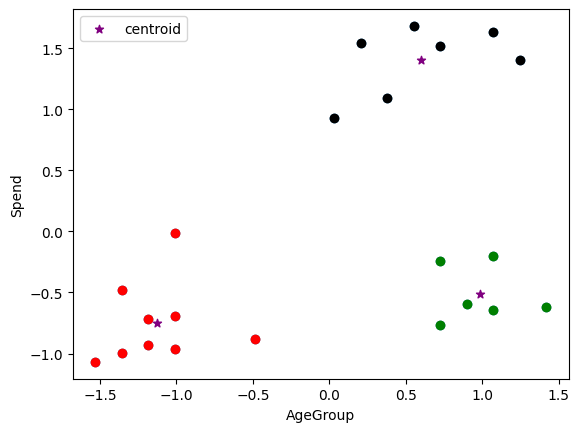

In [5]:
#
# We are using "Feature Scaling Techniques" since the clusters are not formed correctly *****
# MinMaxScaler() -  Preprocessing the featuers using min max scaler
#  In min-max, you subtract the minimum value in the dataset from all the values and then
#     divide this by the dataset's range (maximum-minimum).
#

scaler = MinMaxScaler()
scaler.fit(df[['Spend']])
df['Spend'] = scaler.transform(df[['Spend']])
scaler.fit(df[['AgeGroup']])
df['AgeGroup'] = scaler.transform(df[['AgeGroup']])
print(df.head())
plt.scatter(df.AgeGroup,df['Spend'])


km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['AgeGroup','Spend']])
y_predicted
df['cluster']=y_predicted
df.head(25)
print(km.cluster_centers_)

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.AgeGroup,df1['Spend'],color='green')
plt.scatter(df2.AgeGroup,df2['Spend'],color='red')
plt.scatter(df3.AgeGroup,df3['Spend'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('AgeGroup')
plt.ylabel('Spend')
plt.legend()



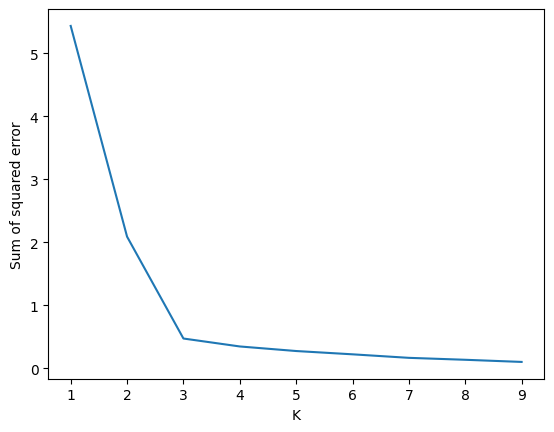

In [21]:
#
# Elbow Method , The sum of Squared Errors =SSE
# km.inertia_ - Inertia measures the sum of squared distances between data points (xi​) and their assigned cluster centroids
#
#
sse = [] # The sum of Squared Errors =SSE
k_rng = range(1,10)
for k in k_rng:
   km = KMeans(n_clusters=k)
   km.fit(df[['AgeGroup','Spend']])
   sse.append(km.inertia_)

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [6]:
from sklearn.metrics import silhouette_score

In [7]:
silhouette_score(df[['AgeGroup','Spend']], km.fit_predict(df[['AgeGroup','Spend']]))

0.7119890290065082

In [ ]:
# K Value Selection

# 1.Domain Knowledge
# 2.Elbow Method
# 3.Silhouttescore